In [351]:
import numpy as np
import seaborn as sns
import pandas as pd

In [352]:
df = pd.read_excel("Data/Data_file.xlsx")   # Importing Data

In [353]:
df.head(5)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## Checking if there are null variables

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [355]:
df.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [356]:
# Correlation analysis
df.corr()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,1.000000,-0.014298,0.005475,0.000593,-0.031467,-0.022586
Previous CTC,-0.014298,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.005475,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,0.000593,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),-0.031467,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,-0.022586,0.270260,0.007518,-0.017557,0.301569,1.000000


#### We can clearly analyse that Previous CTC and Exp (Months) are effecting the CTC value very much

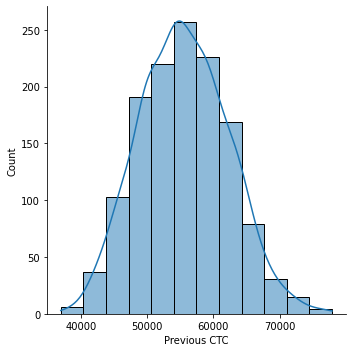

In [357]:
sns.displot(df["Previous CTC"], bins = 12, kde = True)

### Outlier Analysis on CTC

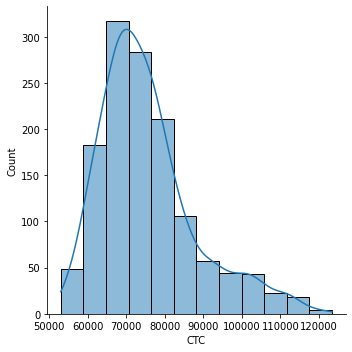

In [358]:
sns.displot(df["CTC"], bins = 12, kde = True)

<AxesSubplot:ylabel='CTC'>

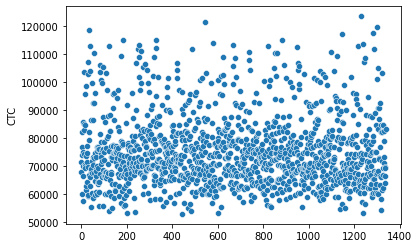

In [359]:
sns.scatterplot(x = df["CTC"].index, y = df["CTC"])

<AxesSubplot:xlabel='CTC'>

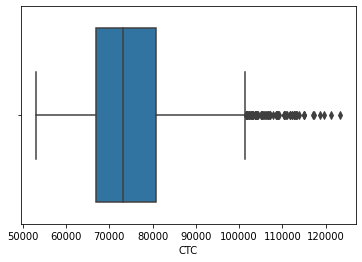

In [360]:
sns.boxplot(x = df["CTC"])

#### Looks like everything is normal on CTC column, except several values, but they are not much outlier values, so I won't do any preprocessing here

### Outlier Analysis on Exp(Months)

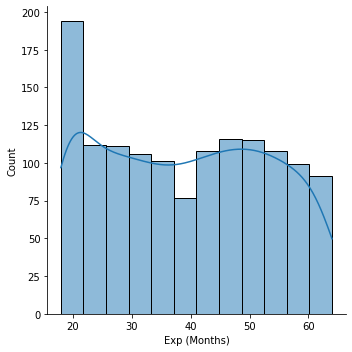

In [361]:
sns.displot(data = df["Exp (Months)"], kde = True)

<AxesSubplot:ylabel='Exp (Months)'>

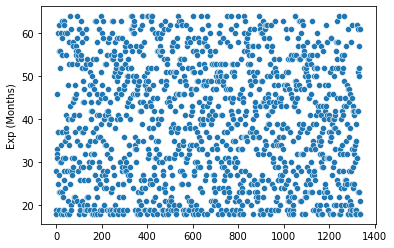

In [362]:
sns.scatterplot(x = df["Exp (Months)"].index, y = df["Exp (Months)"])

#### Looks like everything is normal on Exp (Months) column

<AxesSubplot:xlabel='Role', ylabel='CTC'>

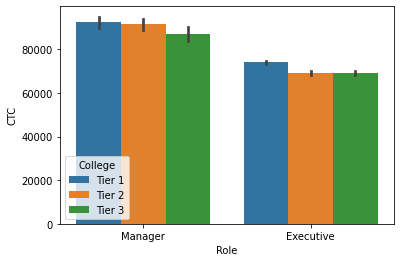

In [363]:
sns.barplot(x = df["Role"], y = df["CTC"], hue = df["College"])

#### Tier also effects the salary, but i was expecting it to be more effective

### Does city type effects the salary?

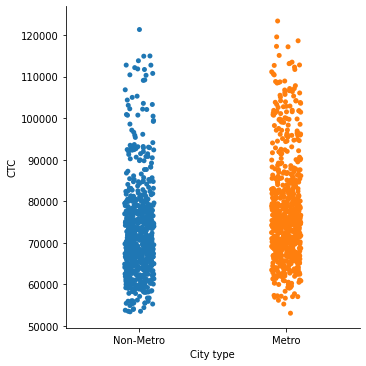

In [364]:
sns.catplot(x = "City type", y = "CTC", data = df)

<AxesSubplot:xlabel='Role', ylabel='CTC'>

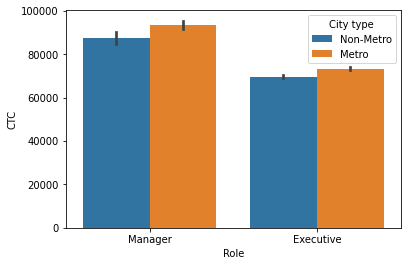

In [365]:
sns.barplot(x = df["Role"], y = df["CTC"], hue = df["City type"])

In [366]:
df.head(5)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


#### Now, we can understand that having metro is effective on the CTC

## Preprocessing

In [367]:
from sklearn.preprocessing import LabelEncoder # Data Transformation

In [368]:
lbe = LabelEncoder()

df["Role_Manager"] = lbe.fit_transform(df["Role"])
df["City_Metro"] = lbe.fit_transform(df["City type"])
df = pd.get_dummies(df, columns = ["College"], prefix = ["College"])
 
df.drop(["Role", "City type"],axis = 1, inplace = True)

In [369]:
df.head(5)

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_Manager,City_Metro,College_Tier 1,College_Tier 2,College_Tier 3
0,1,55523,3,66,19,71406.576531,1,1,1,0,0
1,2,57081,1,84,18,68005.870631,0,0,0,1,0
2,3,60347,2,52,28,76764.020277,0,0,0,1,0
3,4,49010,2,81,33,82092.386880,0,0,0,0,1
4,5,57879,4,74,32,73878.097729,0,0,0,0,1


In [370]:
trainX = df.drop(["CTC", "S.No."], axis = 1)
trainY = df["CTC"]

## Using different methods on data

In [371]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

trainX_minMaxScaled = trainX.copy()
trainX_Normalized = trainX.copy()
trainX_StandardScaled = trainX.copy()

In [372]:
minMaxScaler = MinMaxScaler(feature_range = (0,1))
trainX_minMaxScaled = minMaxScaler.fit_transform(trainX_minMaxScaled)

trainX_Normalized = normalize(trainX_Normalized)

standardScaler = StandardScaler()
trainX_StandardScaled = standardScaler.fit_transform(trainX_StandardScaled)

## Test Data Preprocessing

In [373]:
test = pd.read_excel("Data/Test_data_file.xlsx")
test.head(5)

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [374]:
test.drop(["College", "Role", "City type"], axis = 1, inplace = True)  # Removing duplicate columns

In [375]:
test["College_T3"] = None  # Since the data hasn't got Column College_T3, let's make it by our hand

In [376]:
for row in range(len(test)):
    if ((test["College_T1"][row] == 0) and (test["College_T2"][row] == 0)):
        test["College_T3"][row] = 1
    else:
        test["College_T3"][row] = 0

# Filling the T3 by comparing the T1 and T2
# If both T1 and T2 are 0, then T3 must be 1, in other scenarios, T3 can't be 1

<ipython-input-376-46de22f23ace>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["College_T3"][row] = 0
<ipython-input-376-46de22f23ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["College_T3"][row] = 1


In [377]:
test.head(5)

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,College_T3
0,1,0,1,0,55523,3,66,19,71406.576531,NaN,0
1,0,1,0,1,57081,1,84,18,68005.870631,NaN,0
2,0,1,0,1,60347,2,52,28,76764.020277,NaN,0
3,0,0,0,1,49010,2,81,33,82092.386880,NaN,1
4,0,0,0,1,57879,4,74,32,73878.097729,NaN,1


In [378]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_T1            1338 non-null   int64  
 1   College_T2            1338 non-null   int64  
 2   Role_Manager          1338 non-null   int64  
 3   City_Metro            1338 non-null   int64  
 4   previous CTC          1338 non-null   int64  
 5   previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp                   1338 non-null   int64  
 8   Actual CTC            1338 non-null   float64
 9   Predicted CTC         0 non-null      float64
 10  College_T3            1338 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 115.1+ KB


In [379]:
test["College_T3"] = test["College_T3"].astype("int64")  # Let's change it's datatype from Object to Integer

In [380]:
# We should make the list order as the same with train data
test = test.reindex(columns=["previous CTC", "previous job changes", "Graduation marks", "Exp", "Role_Manager", "City_Metro", "College_T1", "College_T2", "College_T3", "Actual CTC", "Predicted CTC"])

In [381]:
test.head()

,previous CTC,previous job changes,Graduation marks,Exp,Role_Manager,City_Metro,College_T1,College_T2,College_T3,Actual CTC,Predicted CTC
0,55523,3,66,19,1,0,1,0,0,71406.576531,NaN
1,57081,1,84,18,0,1,0,1,0,68005.870631,NaN
2,60347,2,52,28,0,1,0,1,0,76764.020277,NaN
3,49010,2,81,33,0,1,0,0,1,82092.386880,NaN
4,57879,4,74,32,0,1,0,0,1,73878.097729,NaN


In [382]:
testX = test.drop(["Predicted CTC", "Actual CTC"], axis = 1)
testY = test["Actual CTC"]

In [383]:
testX_minMaxScaled = testX.copy()
testX_Normalized = testX.copy()
testX_StandardScaled = testX.copy()

minMaxScaler = MinMaxScaler(feature_range = (0,1))
testX_minMaxScaled = minMaxScaler.fit_transform(testX_minMaxScaled)

testX_Normalized = normalize(testX_Normalized)

standardScaler = StandardScaler()
testX_StandardScaled = standardScaler.fit_transform(testX_StandardScaled)

## Modelling

In [384]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [385]:
reg = ["Linear Regression", LinearRegression()]
ridge = ["Ridge", Ridge()]
lasso = ["Lasso", Lasso()]
elasticNet = ["Elastic Net", ElasticNet()]
xgboost = ["XGBoost",XGBRegressor()]
baggingReg = ["BaggingReg",BaggingRegressor()]
randomF = ["Random Forest", RandomForestRegressor()]
knn = [KNeighborsRegressor(n_neighbors = n) for n in range(3,8)]  # We can pick the best model by iterating the n value between 3-8
svc = [SVR(), SVR(kernel = "linear"), SVR(kernel = "poly"), SVR(kernel = "sigmoid")]  # Different kernels for SVM

In [386]:
singleModels = [reg, ridge, lasso, elasticNet, xgboost, baggingReg, randomF]  # I will make this part with loops mostly in order to save time

In [388]:
# A simple function to display R2 and MSA score of the models

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
def statistics(yTrue, pred):
    print(f"R2 score: {round(r2_score(yTrue, pred), 3)}\nMAE: {mean_absolute_error(yTrue, pred)}\n----------------")

In [389]:
# A simple function to run the models in the "singlemodels" list
def runModel(models, trainX,  testX, trainY = trainY, testY = testY):
    results = []   # I will keep the top 3 scores in here, since we have many models, no need to show all the scores
    for model in models:
        print(f"*{model[0]}*")  # Model Name
        model[1].fit(trainX, trainY)   # The model is at index 1 in the list
        pred = model[1].predict(testX)
        statistics(testY, pred)

In [390]:
# With StandardScaled
runModel(singleModels, trainX_StandardScaled, testX_StandardScaled)

*Linear Regression*
R2 score: 0.504
MAE: 6932.6178992741025
----------------
*Ridge*
R2 score: 0.502
MAE: 6944.210830938486
----------------
*Lasso*
R2 score: 0.502
MAE: 6944.016293057512
----------------
*Elastic Net*
R2 score: 0.459
MAE: 7211.4138702743785
----------------
*XGBoost*
R2 score: 0.821
MAE: 4369.807578142598
----------------
*BaggingReg*
R2 score: 0.66
MAE: 5645.2551798050445
----------------
*Random Forest*
R2 score: 0.687
MAE: 5467.606296752493
----------------


In [391]:
# With MinMaxScaled
runModel(singleModels, trainX_minMaxScaled, testX_minMaxScaled)

*Linear Regression*
R2 score: 0.502
MAE: 6941.885096885311
----------------
*Ridge*
R2 score: 0.502
MAE: 6944.872559802345
----------------
*Lasso*
R2 score: 0.502
MAE: 6941.2909464315635
----------------
*Elastic Net*
R2 score: 0.192
MAE: 8592.378513378064
----------------
*XGBoost*
R2 score: 0.821
MAE: 4371.547557371229
----------------
*BaggingReg*
R2 score: 0.634
MAE: 5891.581535099924
----------------
*Random Forest*
R2 score: 0.691
MAE: 5448.540589952722
----------------


In [392]:
# With Normalized
runModel(singleModels, trainX_Normalized, testX_Normalized)

*Linear Regression*
R2 score: 0.439
MAE: 7404.0505150332
----------------
*Ridge*
R2 score: 0.0
MAE: 9528.441961478746
----------------
*Lasso*
R2 score: 0.0
MAE: 9528.511912454978
----------------
*Elastic Net*
R2 score: 0.0
MAE: 9528.511893047296
----------------
*XGBoost*
R2 score: 0.813
MAE: 4345.576076033924
----------------
*BaggingReg*
R2 score: 0.659
MAE: 5589.030326698367
----------------
*Random Forest*
R2 score: 0.668
MAE: 5560.1801549657175
----------------


#### Conclusion so far,
#### XGBoost looks the best model so far, all data versions(MinMax, Scaled, Normalized) fits well to it, but StandardScaled data wins with a small difference

### KNN

In [393]:
# The same model function for knn version, since knn and svm has multiple models inside in the list, we should iterate them differently than --
# the models above

def runKNN(models, trainX,  testX, trainY = trainY, testY = testY):
    for n in range(len(models)):
        print(f"n = {models[n].n_neighbors}")  # Index is smaller by 1 from the order as we know
        models[n].fit(trainX, trainY)
        pred = models[n].predict(testX)
        statistics(testY, pred)

In [394]:
# With StandardScaled
runKNN(knn, trainX_StandardScaled, testX_StandardScaled)

n = 3
R2 score: 0.47
MAE: 7216.5739912035515
----------------
n = 4
R2 score: 0.507
MAE: 7019.470644397792
----------------
n = 5
R2 score: 0.519
MAE: 6932.981524372158
----------------
n = 6
R2 score: 0.527
MAE: 6834.4517983629385
----------------
n = 7
R2 score: 0.532
MAE: 6792.320023987078
----------------


In [395]:
# With MinMaxScaled
runKNN(knn, trainX_minMaxScaled, testX_minMaxScaled)

n = 3
R2 score: 0.398
MAE: 7657.961760522814
----------------
n = 4
R2 score: 0.439
MAE: 7430.16834081331
----------------
n = 5
R2 score: 0.452
MAE: 7334.294241730528
----------------
n = 6
R2 score: 0.459
MAE: 7238.010830380457
----------------
n = 7
R2 score: 0.461
MAE: 7239.8912455116915
----------------


In [396]:
# With Normalized
runKNN(knn, trainX_Normalized, testX_Normalized)

n = 3
R2 score: 0.447
MAE: 7051.50806948854
----------------
n = 4
R2 score: 0.357
MAE: 7573.196107001624
----------------
n = 5
R2 score: 0.321
MAE: 7799.5102985534395
----------------
n = 6
R2 score: 0.282
MAE: 8061.922044414361
----------------
n = 7
R2 score: 0.264
MAE: 8140.766500298432
----------------


#### Conclusion for KNN,
#### It looks like Normalized data is not suitable for KNN at all
#### StandardScaled data with KNN n = 7 looks the best among all in KNN, but still not better than XGBoost

### SVM

In [397]:
# The same model function for SVM version

def runSVM(models, trainX,  testX, trainY = trainY, testY = testY):
    for n in range(len(models)):
        print(f"Kernel = {models[n].kernel}")  # Index is smaller by 1 from the order as we know
        models[n].fit(trainX, trainY)
        pred = models[n].predict(testX)
        statistics(testY, pred)

In [398]:
# With StandardScaled
runSVM(svc, trainX_StandardScaled, testX_StandardScaled)

Kernel = rbf
R2 score: -0.033
MAE: 9294.38563381458
----------------
Kernel = linear
R2 score: 0.049
MAE: 8902.946079601737
----------------
Kernel = poly
R2 score: -0.031
MAE: 9290.238792361612
----------------
Kernel = sigmoid
R2 score: -0.027
MAE: 9267.92965545253
----------------


In [399]:
# With MinMaxScaled
runSVM(svc, trainX_minMaxScaled, testX_minMaxScaled)

Kernel = rbf
R2 score: -0.033
MAE: 9295.031006105475
----------------
Kernel = linear
R2 score: -0.025
MAE: 9253.126474058869
----------------
Kernel = poly
R2 score: 0.016
MAE: 9079.580293935123
----------------
Kernel = sigmoid
R2 score: -0.033
MAE: 9300.070864484213
----------------


In [400]:
# With Normalized
runSVM(svc, trainX_Normalized, testX_Normalized)

Kernel = rbf
R2 score: -0.035
MAE: 9312.080479760096
----------------
Kernel = linear
R2 score: -0.035
MAE: 9312.080488722846
----------------
Kernel = poly
R2 score: -0.035
MAE: 9312.080465242234
----------------
Kernel = sigmoid
R2 score: -0.035
MAE: 9312.080493107218
----------------


#### Conclusion for SVM
#### As we see, most of the R2 scores in the models are negative or so small(Almost 0), this means the data doesn't fit well to this model
#### So SVM can be eliminated directly

## General Conclusion for Models

#### Looks like XGBoost with StandardScaled data has the best score, so I will continue with it for final part

In [503]:
xgboostModel = XGBRegressor()
xgboostModel.fit(trainX_StandardScaled, trainY)
preds = xgboostModel.predict(testX_StandardScaled)
statistics(testY, preds)

R2 score: 0.821
MAE: 4369.807578142598
----------------


## Model Tuning with RandomizedSearchCV

In [491]:
from sklearn.model_selection import RandomizedSearchCV

params = {
 "learning_rate" : [0.05,0.10,0.20,0.3,0.35, 0.4],
 "max_depth" : [3, 4, 5, 6, 8, 10],
 "min_child_weight" : [1, 3, 5],
 "gamma": [0, 0.1, 0.2, 0.3],
 "colsample_bytree" : [0.5, 1],
 "n_estimators": [100, 200, 500]
}
xgb = XGBRegressor()

rsModel=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [493]:
rsModel.fit(trainX_Normalized, trainY)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                 

In [494]:
rsModel.best_params_

{'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.4,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [495]:
xgbTuned = XGBRegressor(colsample_bytree = 0.5,
 learning_rate = 0.4,
 max_depth = 6,
 n_estimators = 500,
 gamma = 0.3,
 min_child_weight = 5
 )

xgbTuned.fit(trainX_Normalized, trainY)
pred = xgbTuned.predict(testX_Normalized)

statistics(testY, pred)

R2 score: 0.831
MAE: 4235.275137461927
----------------


#### After Tuning:
#### R2 Score increased by: 0.01
#### MAE score decrased by: 134

#### Not a effective difference but better

In [504]:
result = test.copy()

### Inserting the predictions to the rows

In [505]:
for index in range(len(result)):
    result["Predicted CTC"][index] = pred[index]

<ipython-input-505-d5f20d12df76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Predicted CTC"][index] = pred[index]


In [506]:
result.head(5)

,previous CTC,previous job changes,Graduation marks,Exp,Role_Manager,City_Metro,College_T1,College_T2,College_T3,Actual CTC,Predicted CTC
0,55523,3,66,19,1,0,1,0,0,71406.576531,83032.968750
1,57081,1,84,18,0,1,0,1,0,68005.870631,63032.562500
2,60347,2,52,28,0,1,0,1,0,76764.020277,72274.601562
3,49010,2,81,33,0,1,0,0,1,82092.386880,78552.781250
4,57879,4,74,32,0,1,0,0,1,73878.097729,68946.187500


### Converting the result dataframe to the excel file and uploading it to current directory

In [507]:
result.to_excel("output.xlsx")